# 1. Data Preporcessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
sns.set_style("whitegrid")

In [ ]:
# df = pd.read_csv("./flightdataset.csv",index_col=0)
flights = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%201/data/dataset.csv",index_col=0)
df = flights.copy()
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()
# df.info()

There are 300153 observations for 11 predictors.


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df["airline"] = df["airline"].replace({'AirAsia':1,'Air_India':2,'GO_FIRST':3, 'Indigo':4, 'SpiceJet':5, 'Vistara':6}).astype(int)
df["stops"]  = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
df["class"] = df["class"].replace({'Economy':1,'Business':2}).astype(int)
df["departure_time"] = df["departure_time"].replace({"Early_Morning":1, "Morning":2, "Afternoon":3, "Evening":4, "Night":5, "Late_Night":6}).astype(int)
df["arrival_time"] = df["arrival_time"].replace({"Early_Morning":1, "Morning":2, "Afternoon":3, "Evening":4, "Night":5, "Late_Night":6}).astype(int)
df['source_city'] = df['source_city'].replace({'Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5, 'Delhi':6})
df['destination_city'] = df['destination_city'].replace({'Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5, 'Delhi':6})
df = df.drop('flight', axis = 1)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 25.2 MB


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,4.104873,3.427722,2.867814,0.924312,3.699087,3.420719,1.311464,12.221021,26.004751,20889.660523
std,1.833265,1.814686,1.416183,0.398106,1.351441,1.783519,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,4.000000,3.000000,3.000000,1.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,6.000000,5.000000,4.000000,1.000000,5.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


# 2. EDA

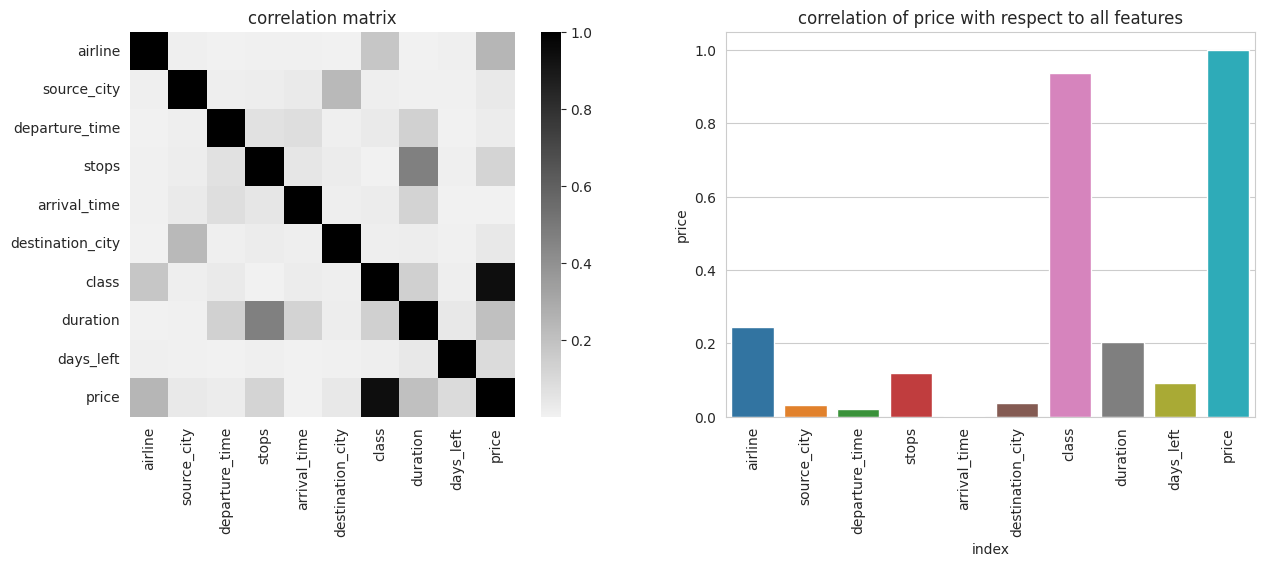

In [ ]:
corr_matrix = df.corr().abs()
corr= corr_matrix['price'].transpose().reset_index()
fig, ax = plt.subplots(1,2, figsize= ( 15, 5))

ax[0].set_title("correlation matrix")
sns.heatmap(corr_matrix, cmap=sns.light_palette(color="#000", as_cmap=True), square=True, ax=ax[0])

ax[1].set_title("correlation of price with respect to all features")
sns.barplot(corr, x='index', y='price', ax = ax[1])
bar_plot = plt.xticks(rotation=90)

taking the correlation of price with respect to other features from correlation matrix barplot clearly suggests the class feature has the highest correlation followed by airline, duration, stops etc.
So, further we will plot two graphs based on class(i.e. one for economy class and other for business class).

<Axes: title={'center': 'variation of prices in business class'}, xlabel='price'>

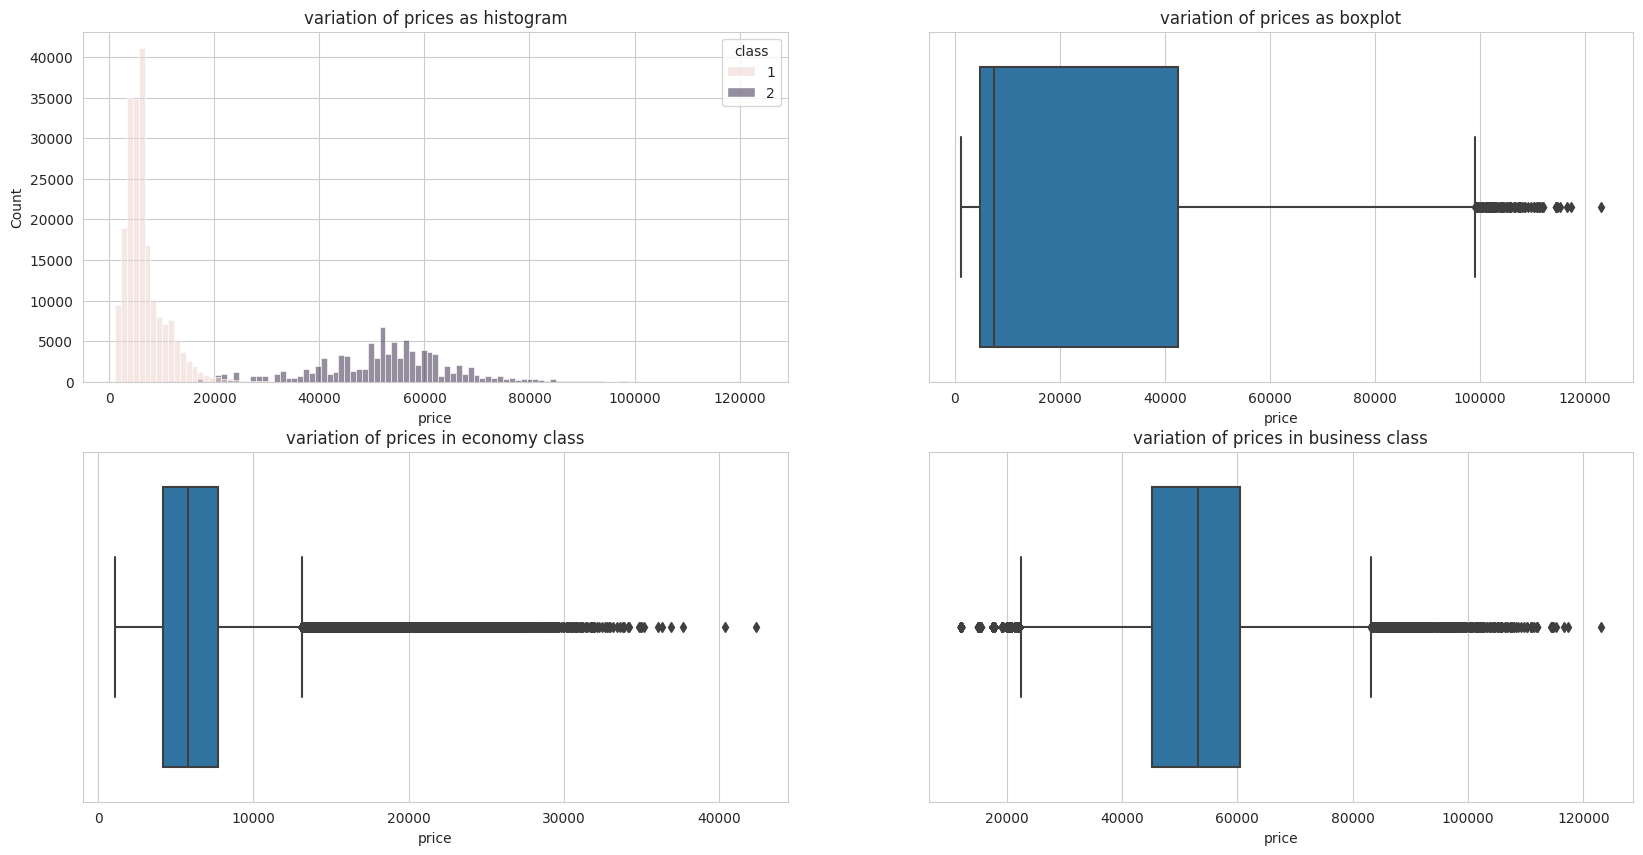

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title("variation of prices as histogram")
sns.histplot(x = 'price', data = df, hue = df["class"])

plt.subplot(2,2,2)
plt.title("variation of prices as boxplot")
sns.boxplot(x = 'price', data = df)

plt.subplot(2,2,3)
plt.title("variation of prices in economy class")
sns.boxplot(x = 'price', data = df.loc[df["class"]==1])

plt.subplot(2,2,4)
plt.title("variation of prices in business class")
sns.boxplot(x = 'price', data = df.loc[df["class"]==2])

Histogram plot contains two gaussian curves it is because of presence of two different tickets: business and eco.

Text(0.5, 1.0, 'Airline prices based on the class and company')

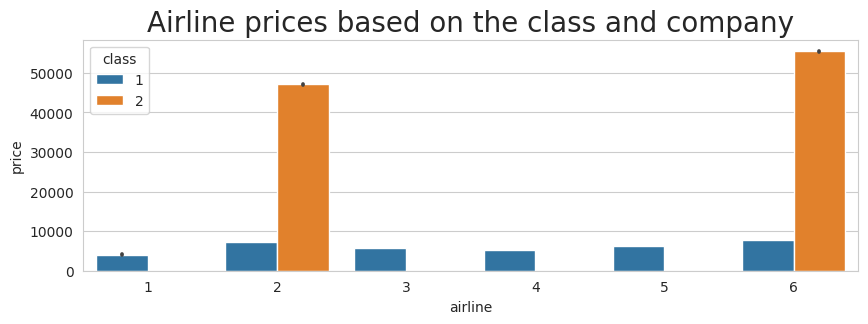

In [ ]:
plt.figure(figsize=(10, 3))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

Business flights are only available in two companies: Air India and Vistara.

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

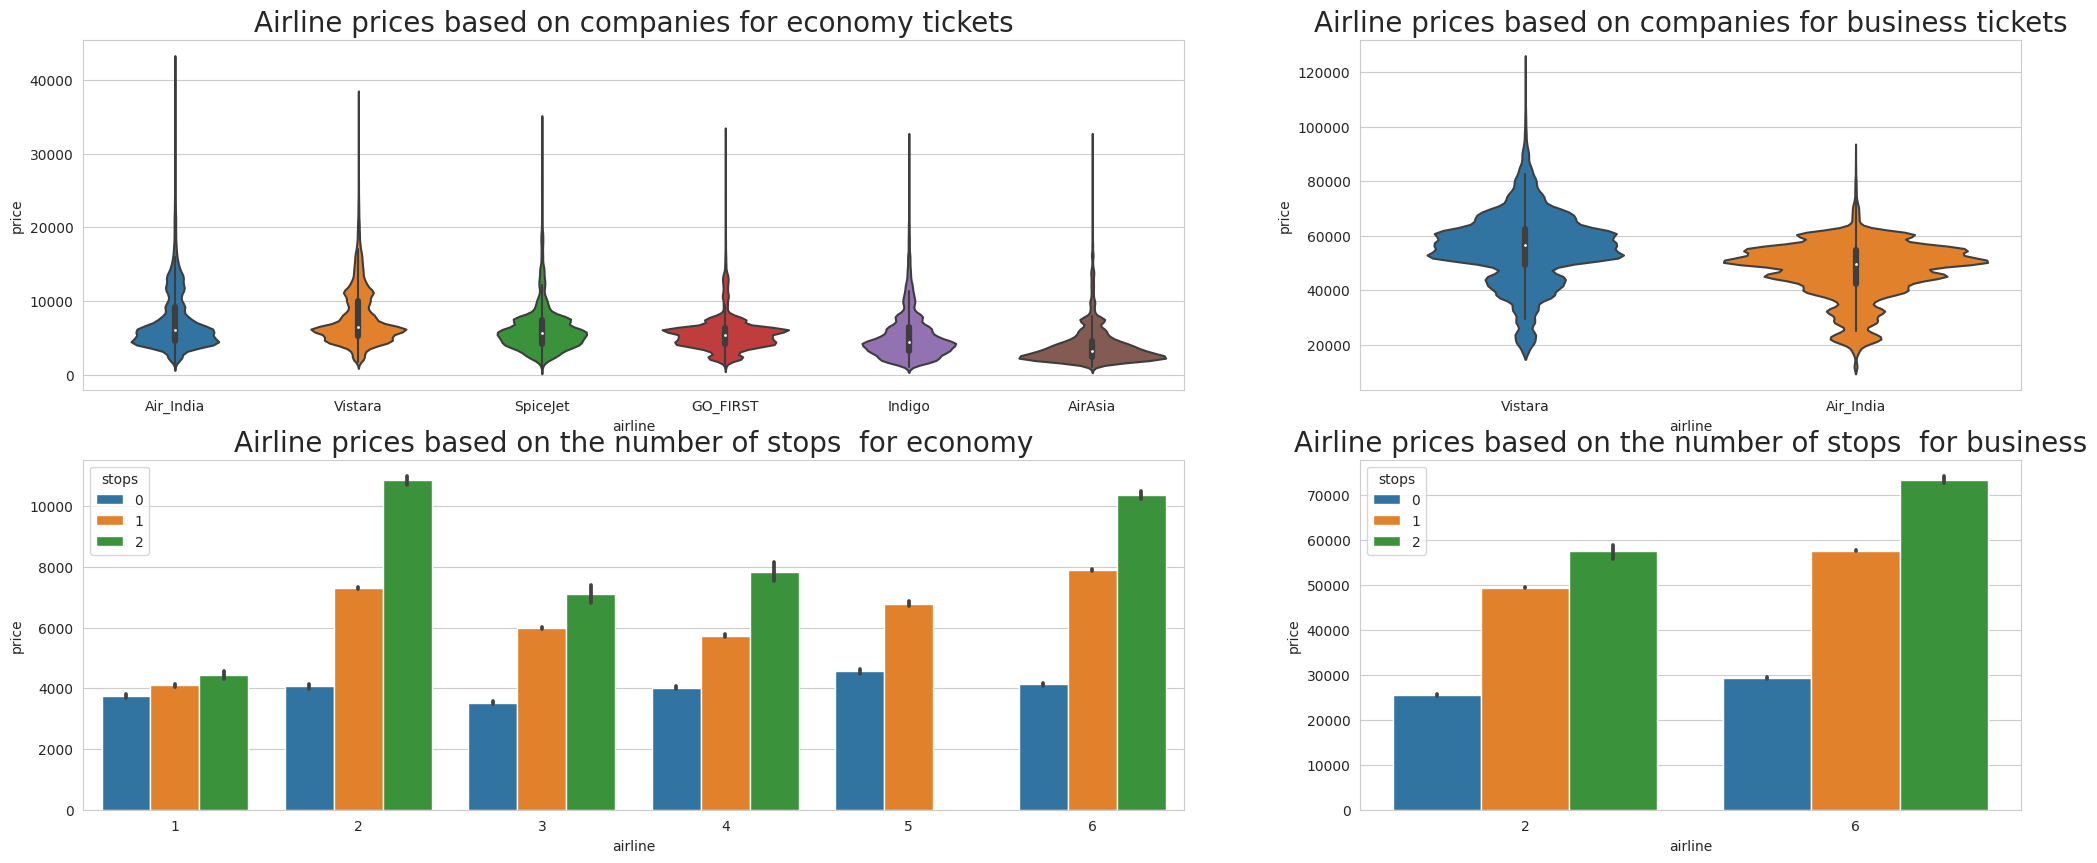

In [ ]:
fig, ax = plt.subplots (2, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 10))

df_temp = flights.loc[flights["class"]=="Economy"].sort_values("price", ascending = False)
sns.violinplot(data = df_temp, x = "airline", y = "price", ax=ax[0][0])
ax[0][0].set_title("Airline prices based on companies for economy tickets",fontsize=20)

df_temp = flights.loc[flights["class"]=="Business"].sort_values("price", ascending = False)
sns.violinplot(y = "price", x = "airline",data = df_temp,  ax=ax[0][1])
ax[0][1].set_title("Airline prices based on companies for business tickets",fontsize=20)

df_temp = df.loc[df["class"]==1].sort_values("price", ascending = False)
sns.barplot(y = "price", x = "airline", hue="stops",data = df_temp, ax=ax[1][0])
ax[1][0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)

df_temp = df.loc[df["class"]==2].sort_values("price", ascending = False)
sns.barplot(y = "price", x = "airline",hue="stops",data = df_temp, ax=ax[1][1])
ax[1][1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

Air Asia offers lowest prices while Air India and Vistara offers highest prices in economy class
Business class tickets are only offered by Vistara and Air India. <br>
AirAsia have the cheapest flights
Air India and Vistara are more expensive.
Vistara's business tickets are more expensive than the Air India's ones.

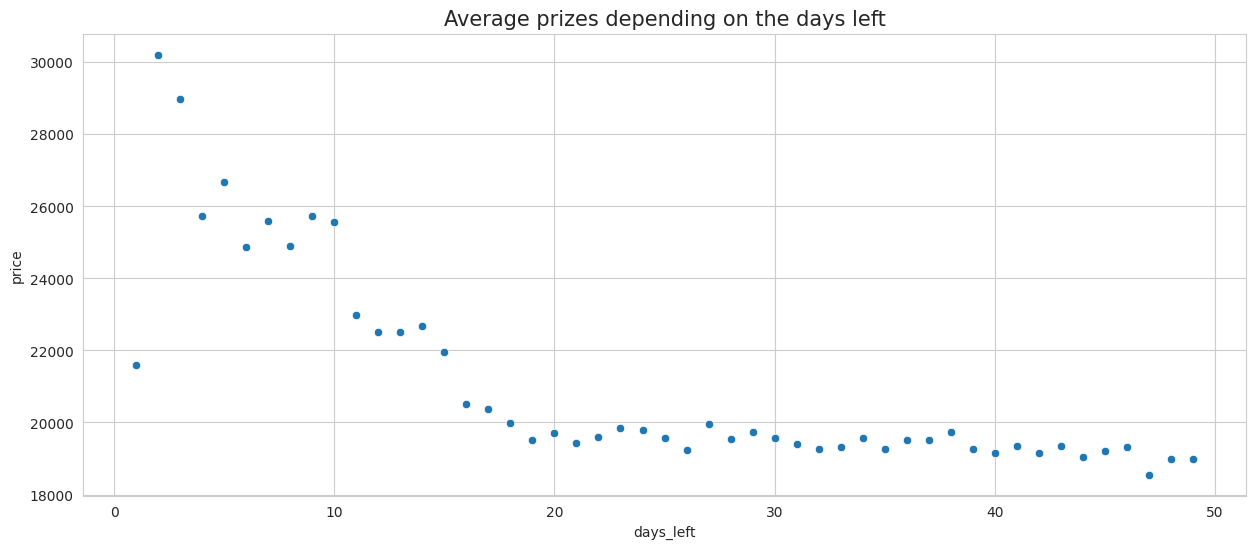

In [ ]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)



It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, and a positive monotone curve between 20 and 2 days before.


<Axes: title={'center': 'Airline prices based on days left before buying the ticket business class'}, xlabel='days_left', ylabel='price'>

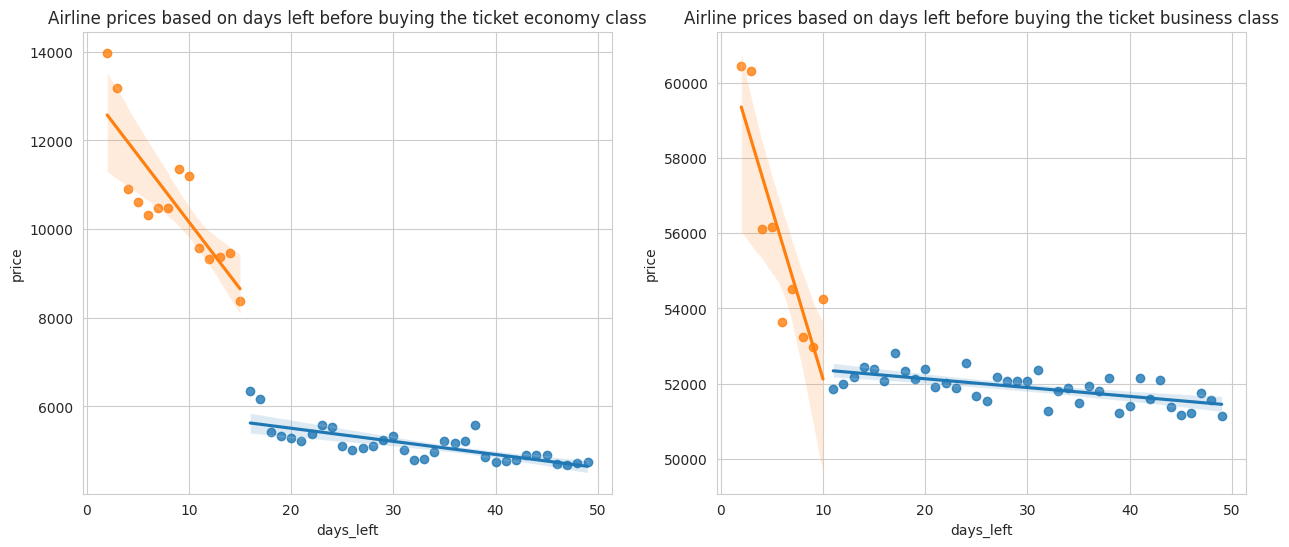

In [ ]:
economy = df[df["class"]==1]
business = df[df["class"]==2]

eco = economy.groupby(['days_left'])['price'].mean().reset_index()
biz = business.groupby(['days_left'])['price'].mean().reset_index()
eco
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].set_title("Airline prices based on days left before buying the ticket economy class")
sns.regplot(x=eco.loc[eco["days_left"]>=16].days_left, y=eco.loc[eco["days_left"]>=16].price, ax=axes[0])
sns.regplot(x=eco.loc[(eco["days_left"]>1)&(eco["days_left"]<16)].days_left, y=eco.loc[(eco["days_left"]>1)&(eco["days_left"]<16)].price, ax=axes[0])

axes[1].set_title("Airline prices based on days left before buying the ticket business class")
sns.regplot(x=biz.loc[biz["days_left"]>=11].days_left, y=biz.loc[biz["days_left"]>=11].price, ax=axes[1])
sns.regplot(x=biz.loc[(biz["days_left"]>1)&(biz["days_left"]<11)].days_left, y=biz.loc[(biz["days_left"]>1)&(biz["days_left"]<11)].price, ax=axes[1])

price increases slowly and then drastically start rising 18 days(for economy class) and 11 days(for busiess class) before the flight and then drastically increases as the departure date approaches. <br>
days_left = 1 and 2  is an outlier for both classes.

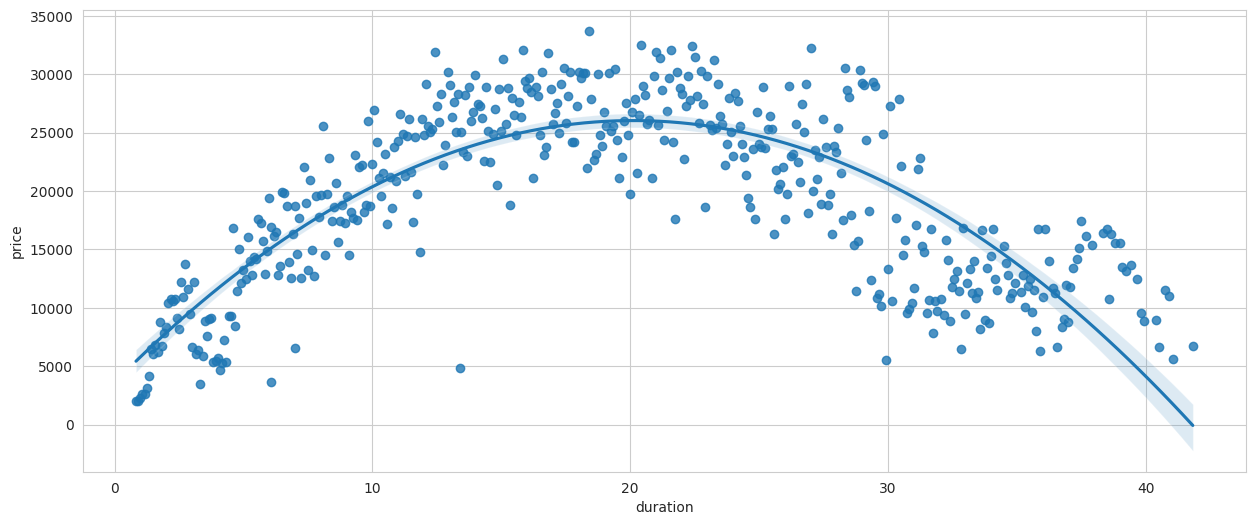

In [ ]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
dfs = df_temp.loc[df_temp["price"] < (75000-1500*df_temp["duration"])]
ax = sns.regplot(x=dfs.duration, y=dfs.price, data=dfs, order=2)

relationship between duration and price is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

However some outliers seem to affect the regression curve that we need to remove

<Axes: title={'center': 'Average prices wrt duration in business class'}, xlabel='duration', ylabel='price'>

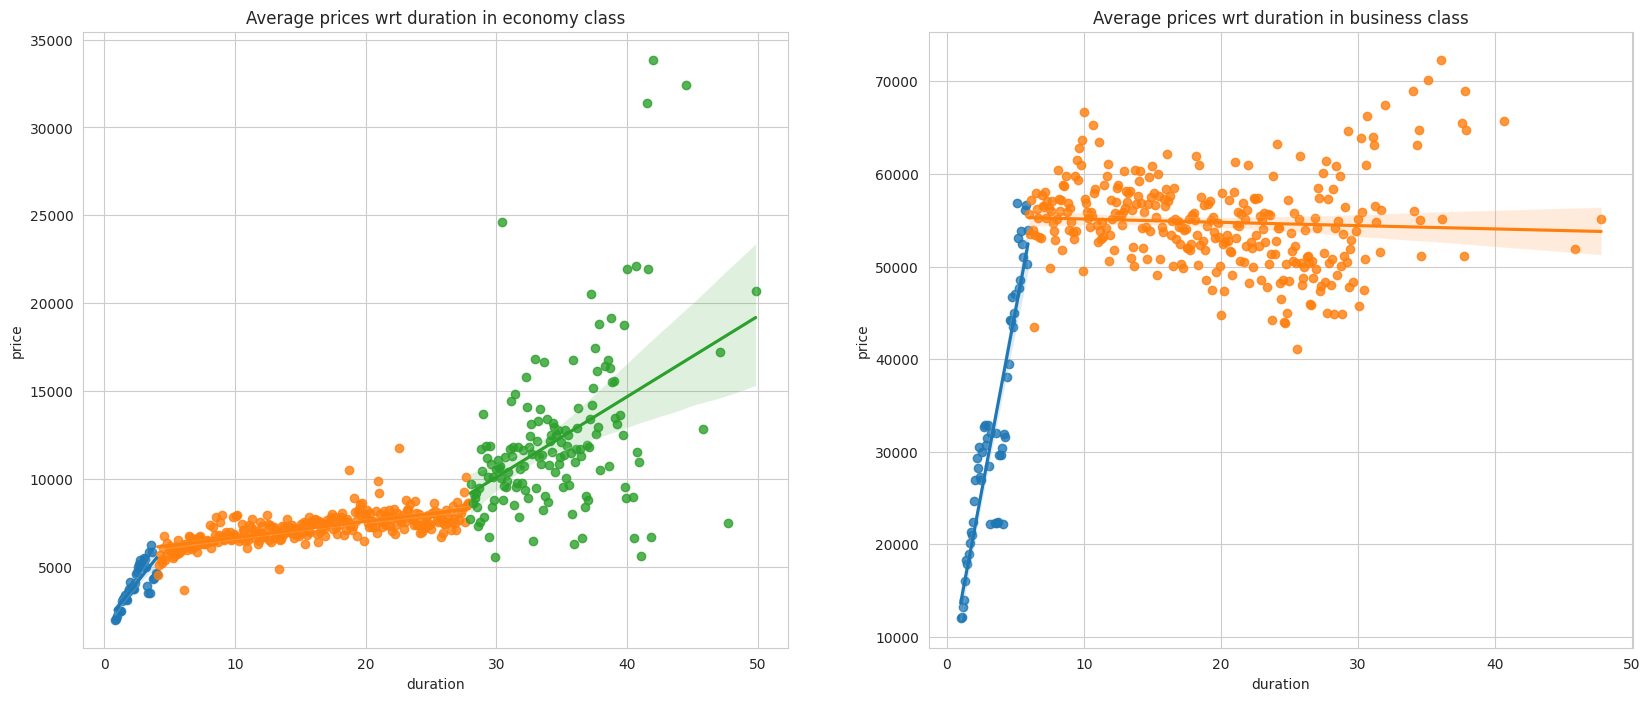

In [ ]:
eco = economy.groupby(['duration'])['price'].mean().reset_index()
biz = business.groupby(['duration'])['price'].mean().reset_index()

fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[0].set_title("Average prices wrt duration in economy class")
sns.regplot(x=eco.loc[eco["duration"]<=4].duration, y=eco.loc[eco["duration"]<=4].price, data=eco, ax = ax[0])
sns.regplot(x=eco.loc[(eco["duration"]>4) & (eco["duration"]<28)].duration, y=eco.loc[(eco["duration"]>4) & (eco["duration"]<28)].price, data=eco, ax = ax[0])
sns.regplot(x=eco.loc[eco["duration"]>=28].duration, y=eco.loc[eco["duration"]>=28].price, data=eco, ax = ax[0])

ax[1].set_title("Average prices wrt duration in business class")
sns.regplot(x=biz.loc[biz["duration"]<6].duration, y=biz.loc[biz["duration"]<6].price, data=biz, ax = ax[1])
sns.regplot(x=biz.loc[biz["duration"]>=6].duration, y=biz.loc[biz["duration"]>=6].price, data=biz, ax = ax[1])

economy class: 2 regression lines can be fitted nicely for duration smaller than 5 and other duration between 5 and 28 <br>
business class:  only one regression line fits appropriately till duration smaller than 6

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

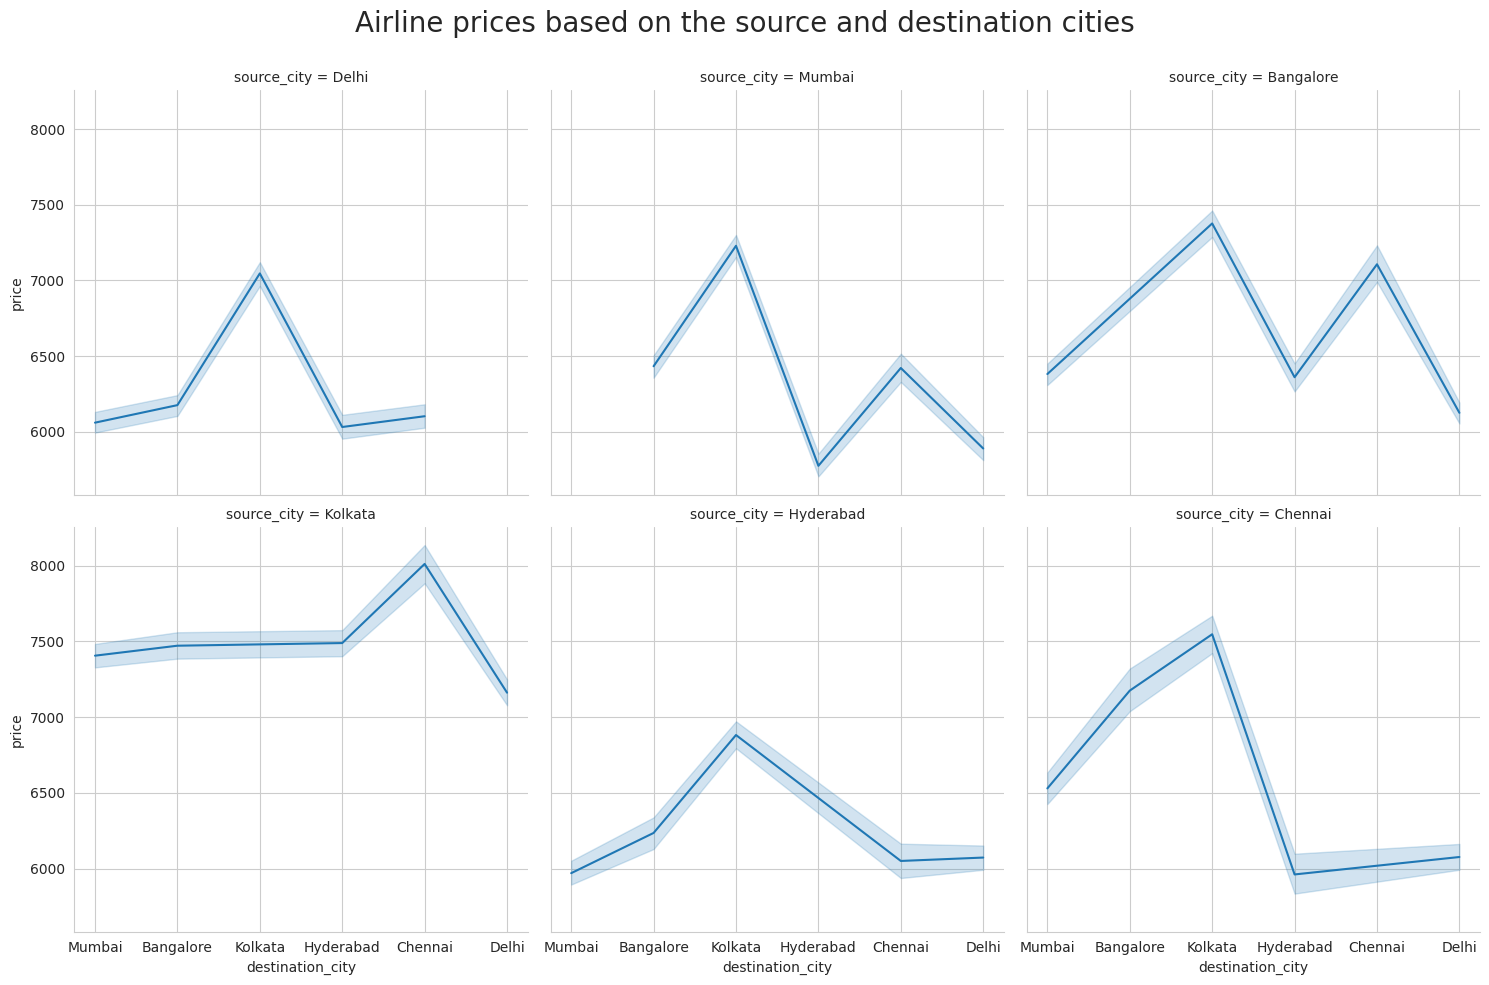

In [ ]:
e = flights[flights["class"]=="Economy"]
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=e, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

# 3. Fitting models

In [ ]:
# Split Data
X = df.drop("price", axis=1)
y = df["price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
x = X_test.loc[12137,:]
# x[x['index']==27131]

KeyError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Regression Metrics
metrics = {
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'R2': r2_score
}

# Function to calculate scores
def calculate_scores(model, X_train, y_train, X_test, y_test, metrics):
    scores = {}
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    for metric_name, metric_function in metrics.items():
        scores[f"{metric_name} (Train)"] = metric_function(y_train, y_pred_train)
        scores[f"{metric_name} (Test)"] = metric_function(y_test, y_pred_test)

    return scores

# Training and Evaluation performed by running a loop for each of the functions
for name, model in models.items():
    # Fit on the training set
    model.fit(X_train, y_train)
    x = X_test.reset_index()
    # x = x[x['index']==27131]

    y = y_test.reset_index()
    y = y[y['']]
    price = model.predict(x)
    print(price+" "+)
    # Calculate scores
    # scores = calculate_scores(model, X_train, y_train, X_test, y_test, metrics)

    # Print the evaluation results
    # print(f"{name}:\n")
    # for metric_name, score in scores.items():
        # print(f"{metric_name}: {score:.4f}")
    # print("\n")


Linear Regression:

MSE (Train): 47770940.5289
MSE (Test): 47795468.3923
MAE (Train): 4528.1424
MAE (Test): 4500.1479
R2 (Train): 0.9073
R2 (Test): 0.9072


Elastic Net Regression:

MSE (Train): 256285489.5665
MSE (Test): 254490420.2434
MAE (Train): 13221.9278
MAE (Test): 13139.6545
R2 (Train): 0.5026
R2 (Test): 0.5058


Decision Tree:

MSE (Train): 407450.5973
MSE (Test): 11916866.4934
MAE (Train): 65.0057
MAE (Test): 1136.1670
R2 (Train): 0.9992
R2 (Test): 0.9769


Random Forest:

MSE (Train): 1309957.5128
MSE (Test): 7707883.0312
MAE (Train): 417.9201
MAE (Test): 1068.2725
R2 (Train): 0.9975
R2 (Test): 0.9850


XGBoost:

MSE (Train): 11898670.4231
MSE (Test): 12743416.9238
MAE (Train): 1983.0100
MAE (Test): 2045.2046
R2 (Train): 0.9769
R2 (Test): 0.9753




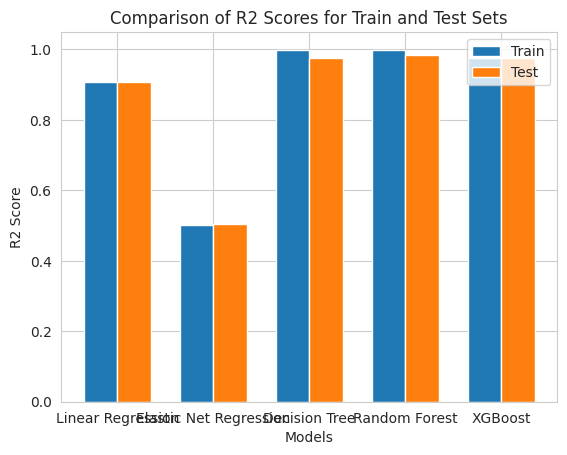

In [ ]:
# Regression Metrics
metrics = {
    'R2': r2_score
}

# Function to calculate R2 scores
def calculate_r2_scores(model, X_train, y_train, X_test, y_test, metrics):
    scores = {}
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    for metric_name, metric_function in metrics.items():
        scores[f"{metric_name} (Train)"] = metric_function(y_train, y_pred_train)
        scores[f"{metric_name} (Test)"] = metric_function(y_test, y_pred_test)

    return scores

# Initialize lists to store model names and R2 scores
model_names = []
r2_scores_train = []
r2_scores_test = []

# Training and Evaluation
for name, model in models.items():
    # Fit on the training set
    model.fit(X_train, y_train)

    # Calculate R2 scores
    scores = calculate_r2_scores(model, X_train, y_train, X_test, y_test, metrics)

    # Append results to lists
    model_names.append(name)
    r2_scores_train.append(scores['R2 (Train)'])
    r2_scores_test.append(scores['R2 (Test)'])

# Create a bar chart
bar_width = 0.35
index = np.arange(len(model_names))
plt.bar(index, r2_scores_train, bar_width, label='Train')
plt.bar(index + bar_width, r2_scores_test, bar_width, label='Test')

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Train and Test Sets')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.show()

In [ ]:
# Feature Importance from Random Forest
rf_model = models["Random Forest"]  # Random Forest is the best-performing model
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_
features = X_train.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
# Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}



# Calculate and Display Mean Squared Error (MSE)
for name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Convert scores to numerical values
    mse_values = [-score for score in scores]

    # Calculate Mean Squared Error (MSE)
    mse_mean = np.mean(mse_values)

    print(f"{name}:\n"
          f"  Cross-validated MSE: {mse_mean:.2f}\n")
# Model Comparison Visualization
model_names = list(models.keys())
mse_values = [-score for score in scores]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=mse_values)
plt.title('Model Comparison: Cross-Validated MSE')
plt.ylabel('Negative MSE (Lower is Better)')
plt.show()



In [ ]:
flights[90]

# 4. Conclusion
<br>
1. The model that gives the best result is the XGBRegressor with on the test dataset an R^2 score equals to 0.9836 and a MAE score equals to 1579.
<br>
2. There is a big gap between flight tickets in business and economy. In average business tickets are 6.5 times more expensive than economy tickets.
<br>
3. Vistara and AirIndia seems to be the most expensive companies and AirAsia the cheapest. However for business tickets, only Vistara and AirIndia are available, and Vistara is slightly more expensive.
<br>
4. In general, prices rise quite slowly until 15 days before the flight where the prices rise drastically. But one day before the flight, there usually are empty seats that have not been sold. Thus it is possible to find tickets three times cheaper than the day before.
<br>
5. The longer the flight is the more expensive the tickets are until it reaches around 20 hours, then the prices tend to decrease.
<br>
6. For the time of the flight:
It seems that departure during the afternoon and late night are cheaper, and night more expensive.
It seems that departure during the early morning, afternoon and late night are cheaper, and evening more expensive.
<br>
7. For the cities of the trip:
Flights from Delhi are the cheapest the from the others cities seems equal on average but slightly more expensive for Chenai.
Flight to Delhi are the cheapest and to Bengalore the most expensive ones.
<br>
8. In general, the more stops there are, the more expensive the flight ticket is.